In [10]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dsets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt  
import numpy as np

In [11]:
train_dataset = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = False)

In [12]:
test_dataset = dsets.MNIST(root = './data', train = False, transform = transforms.ToTensor(), download = False)

In [13]:
n_iter = 3000 
batch_size = 100 
num_epoch = n_iter/(len(train_dataset)/ batch_size)
num_epoch = int(num_epoch)

train_loader = torch.utils.data.DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle= True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset, batch_size = batch_size, shuffle= True)

In [14]:
class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels= 16,kernel_size=5, stride= 1, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size= 5, stride = 1, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0),-1)
        out = self.fc1(out)
        return out

In [15]:
model = CNNmodel()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [16]:
iter = 0 
for epoch in range(num_epoch):
    for i,(images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        iter += 1 
        if iter % 500 == 0: 
            total = 0 
            correct = 0
            lossval = 0
            for images,labels in train_loader:
                images = Variable(images)
                labels = Variable(labels)
                output = model(images)
                loss = criterion(output,labels)
                lossval += loss.item()
                _, predicted = torch.max(output.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            print("iterations : {}, accuracy : {}, loss : {}".format(iter, accuracy, lossval/len(labels)))

iterations : 500, accuracy : 85, loss : 2.6569427417218687
iterations : 1000, accuracy : 92, loss : 1.495492355376482
iterations : 1500, accuracy : 94, loss : 1.1590299484878779
iterations : 2000, accuracy : 95, loss : 0.9479428413510322
iterations : 2500, accuracy : 95, loss : 0.8291626275330782
iterations : 3000, accuracy : 96, loss : 0.7128840801864862


In [12]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    labels = Variable(labels)
    output = model(images)
    _,predicted = torch.max(output.data, 1)
    correct += (predicted == labels).sum()
    total += labels.size(0)
accuracy = 100 * correct/ total
print("accuracy for test dataset ; {}".format(accuracy))

accuracy for test dataset ; 97


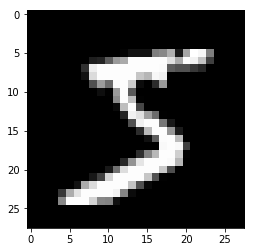

In [7]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap = 'gray')